# IRIS Multiclass Classification Problem

In [1]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [4]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

In [6]:
df.groupby('class').count()

sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
## only notebook local
# !pip install jupyter-summarytools -q

# from summarytools import dfSummary
# dfSummary(df)

In [9]:
import seaborn as sns
sns.set(color_codes=True)

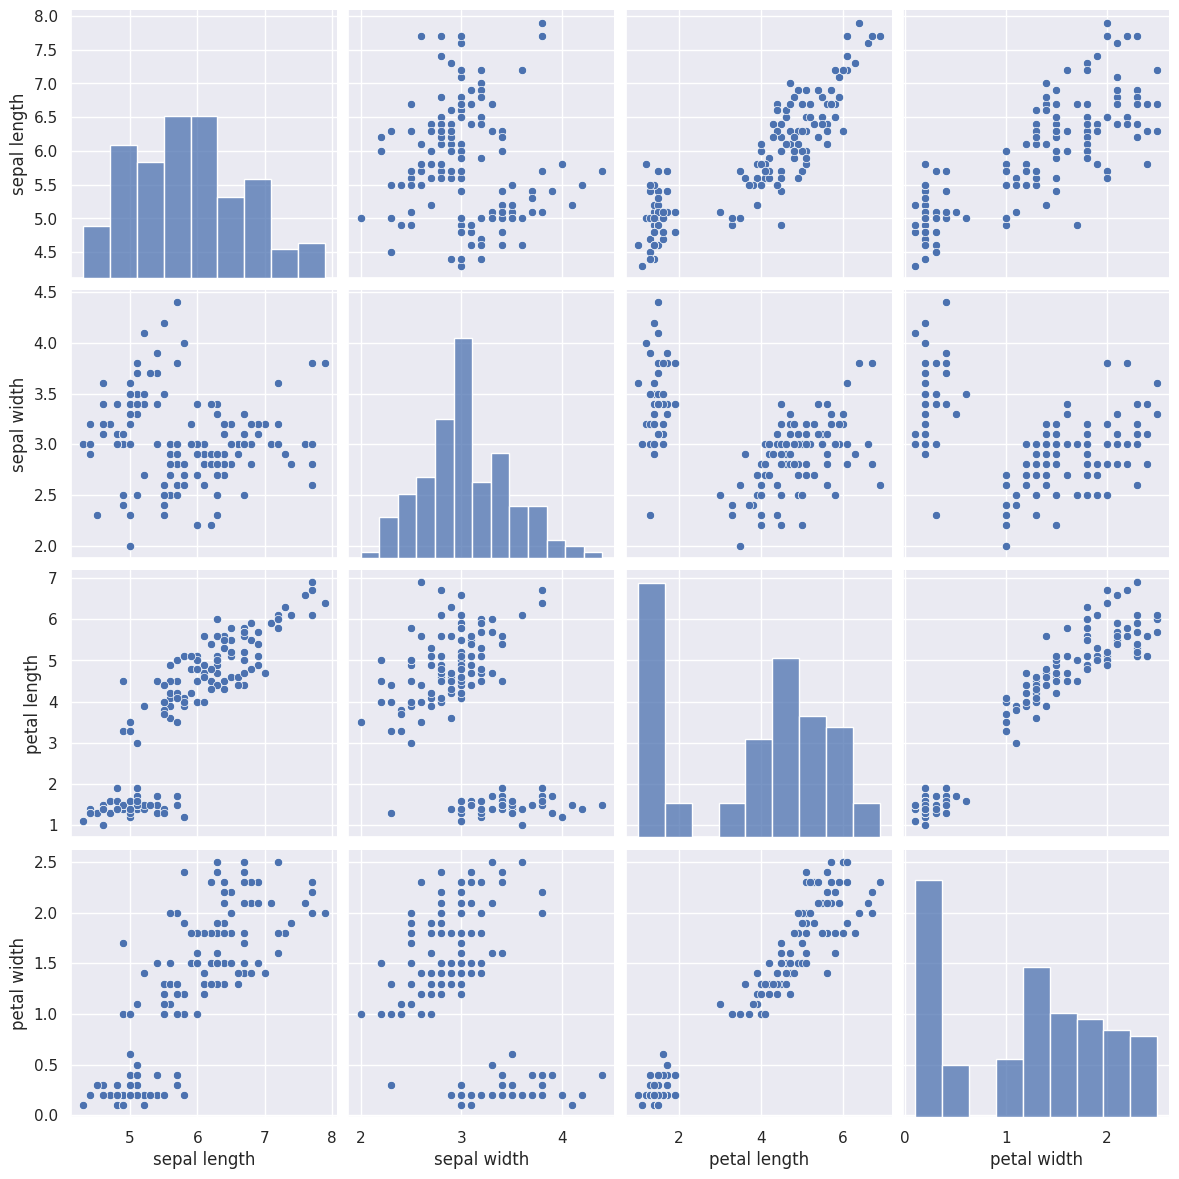

In [10]:
sns.pairplot(df, height=3, aspect=1);

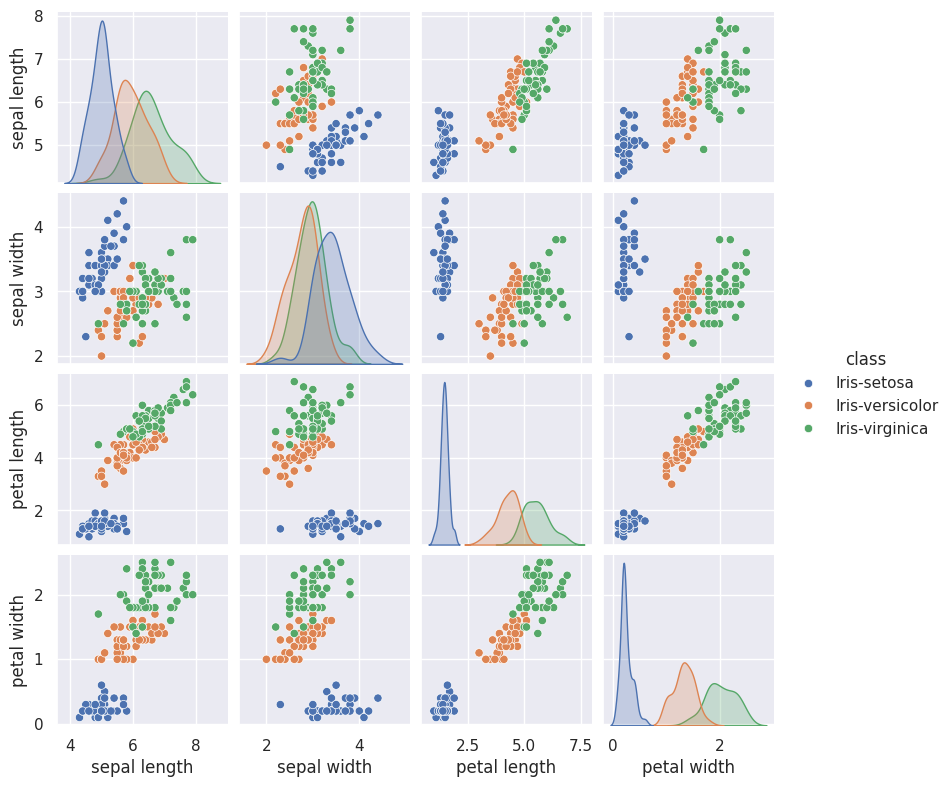

In [11]:
sns.pairplot(df, hue='class', height=2, aspect=1);

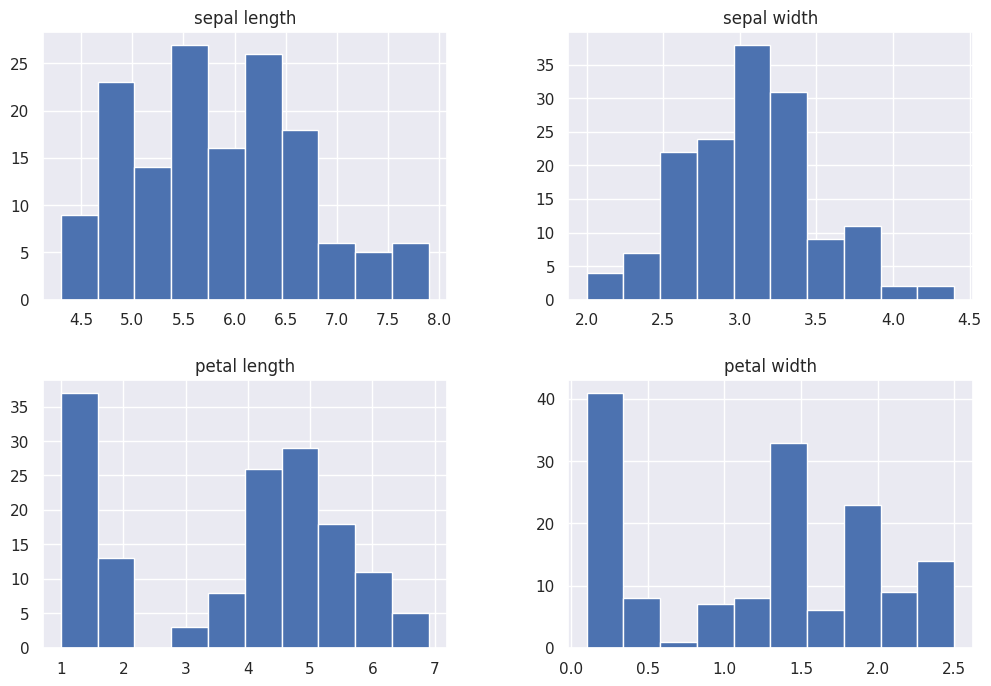

In [12]:
df.hist(figsize=(12,8));

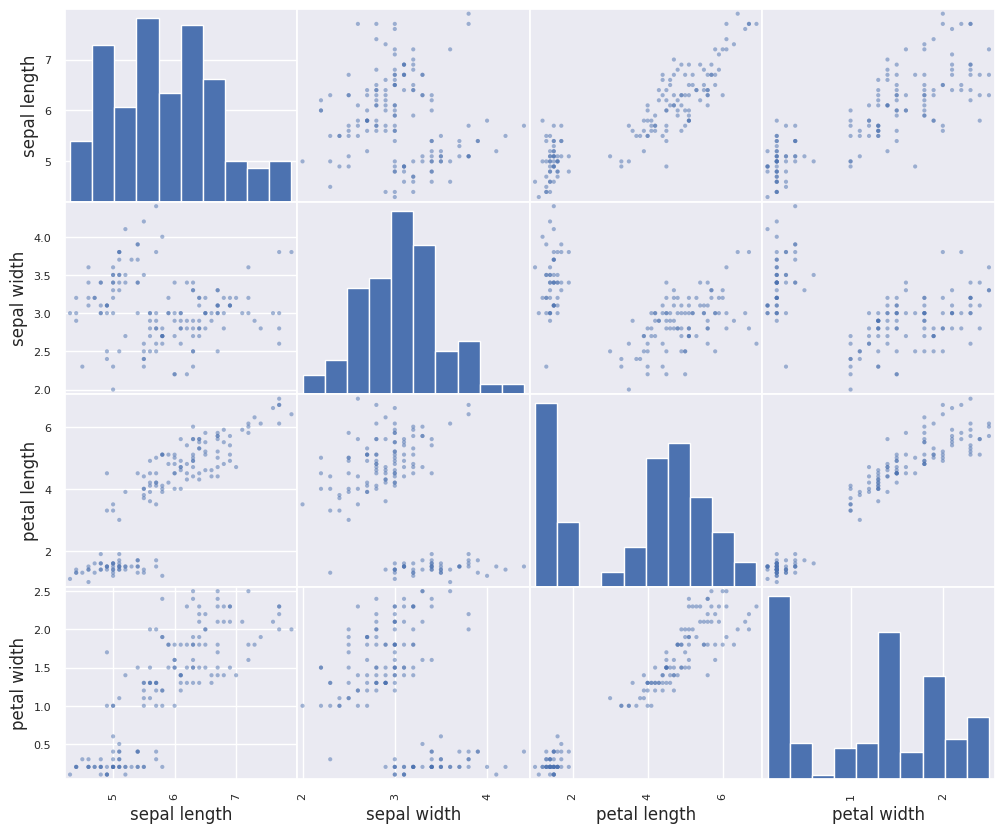

In [13]:
pd.plotting.scatter_matrix(df, figsize=(12,10));

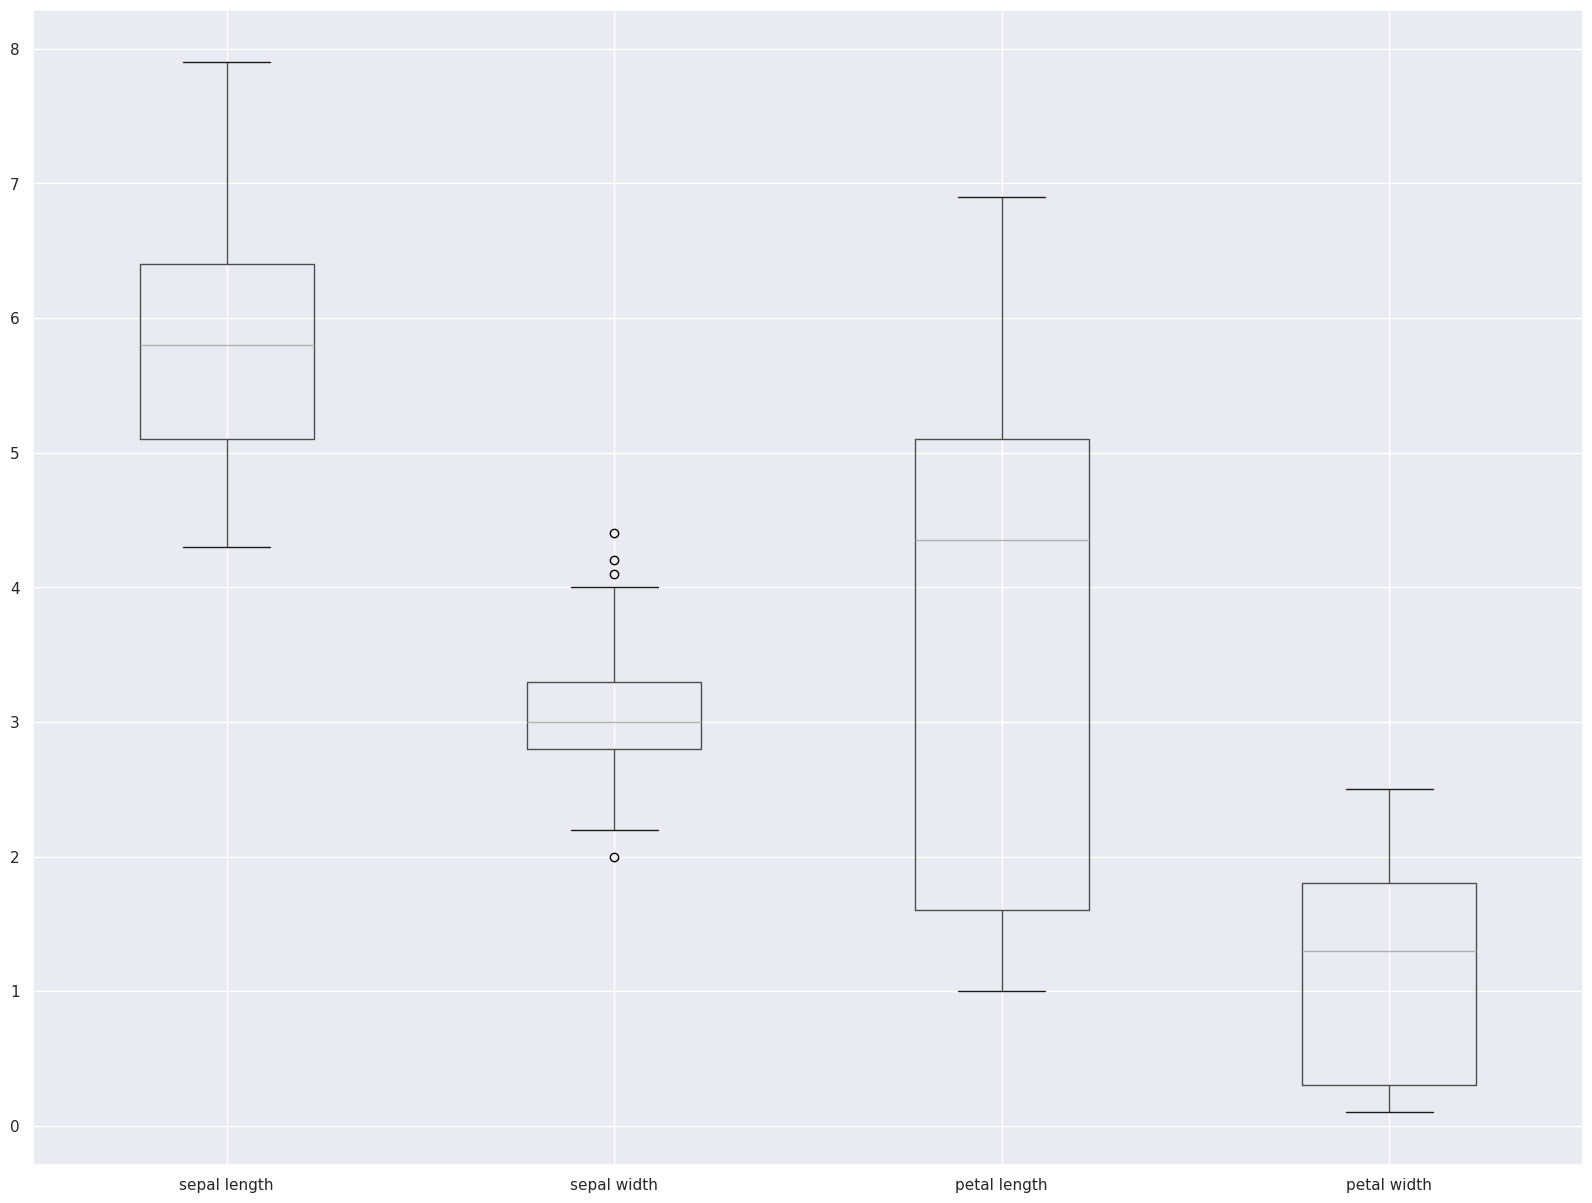

In [14]:
df.boxplot(figsize=(20,15));

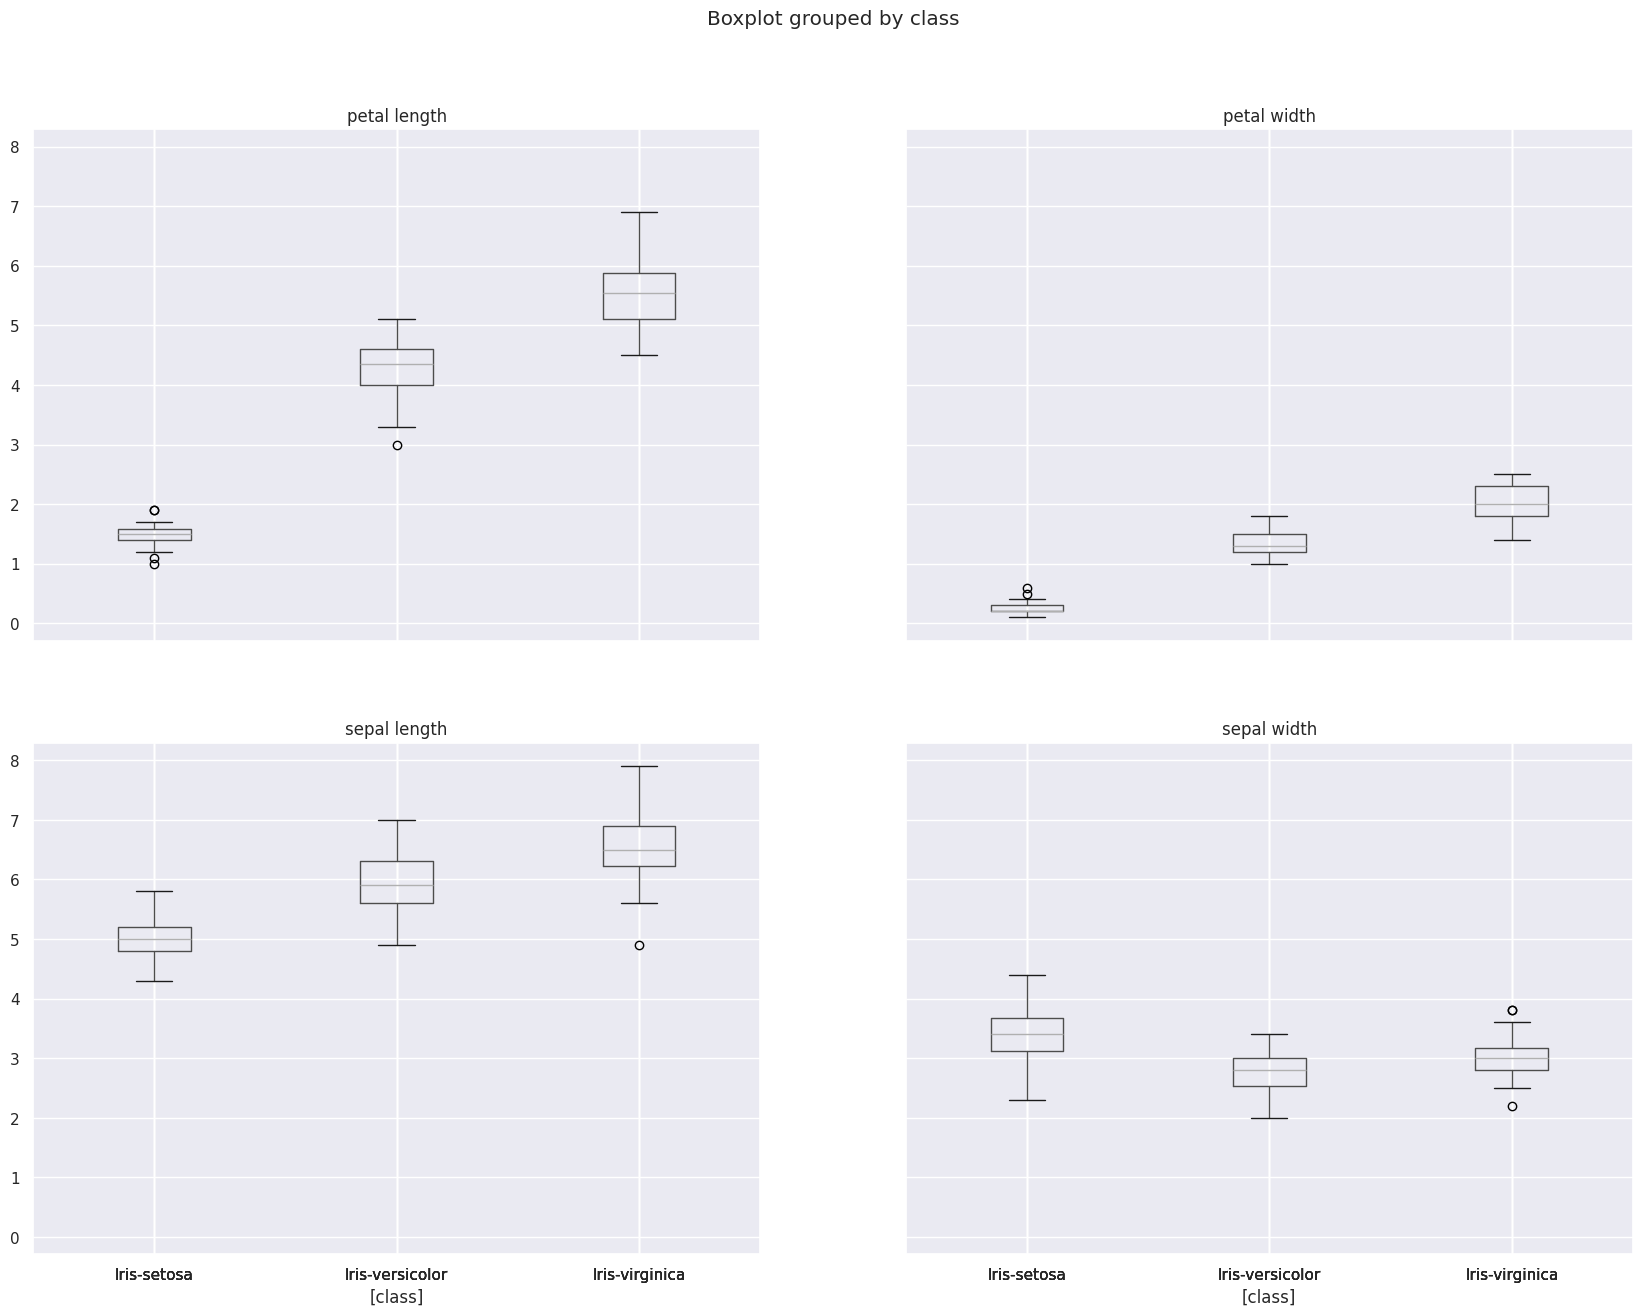

In [15]:
df.boxplot(by='class', figsize=(20,15));

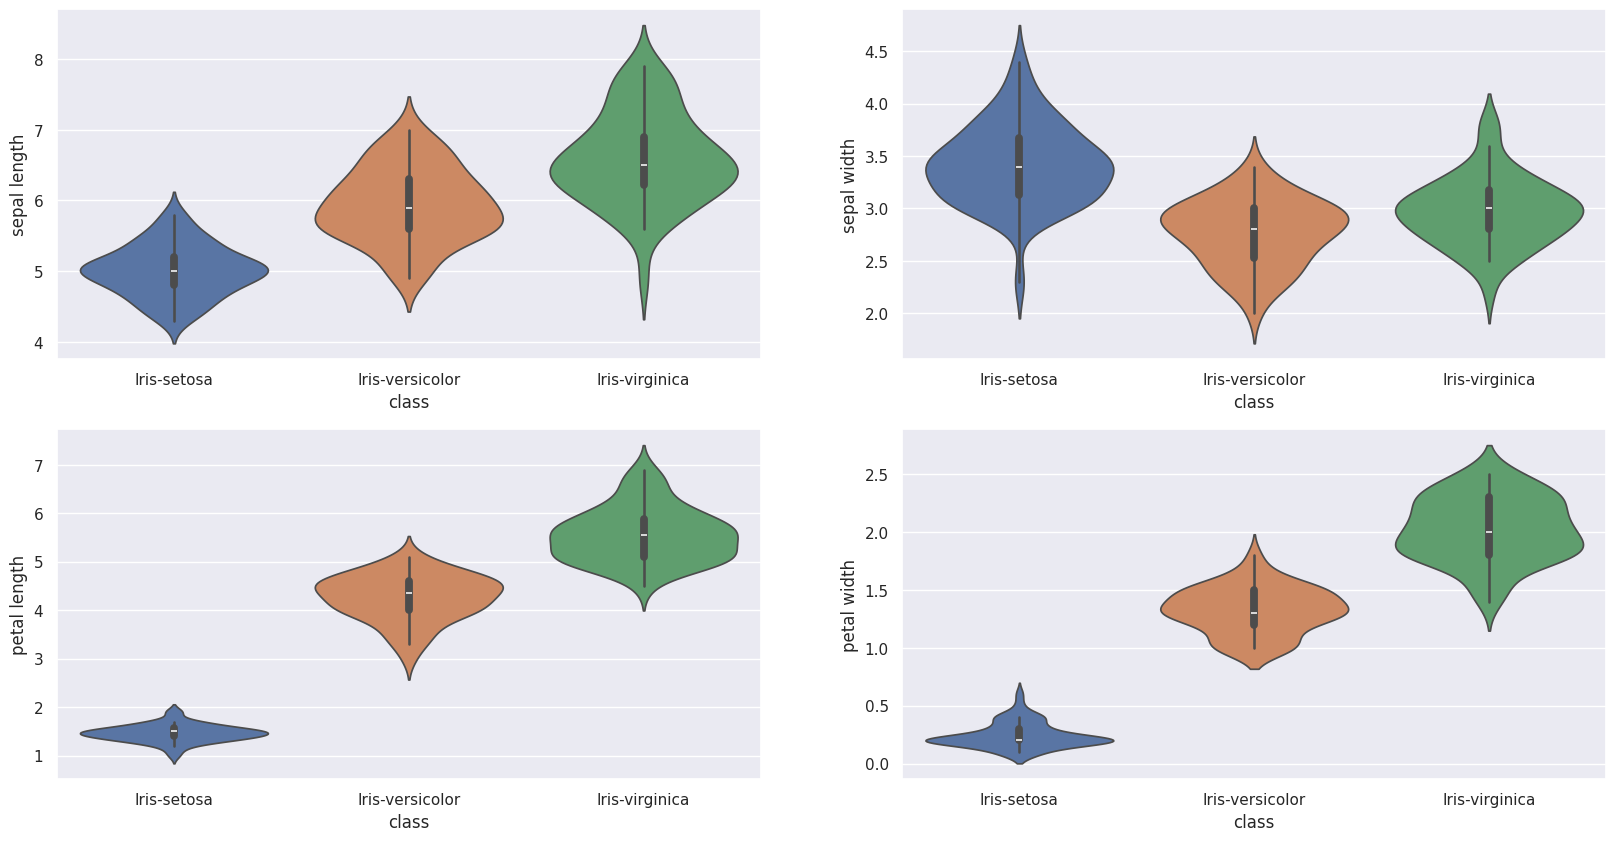

In [16]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal length', data=df,hue="class")
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal width', data=df,hue="class")
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal length', data=df,hue="class")
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df,hue="class");

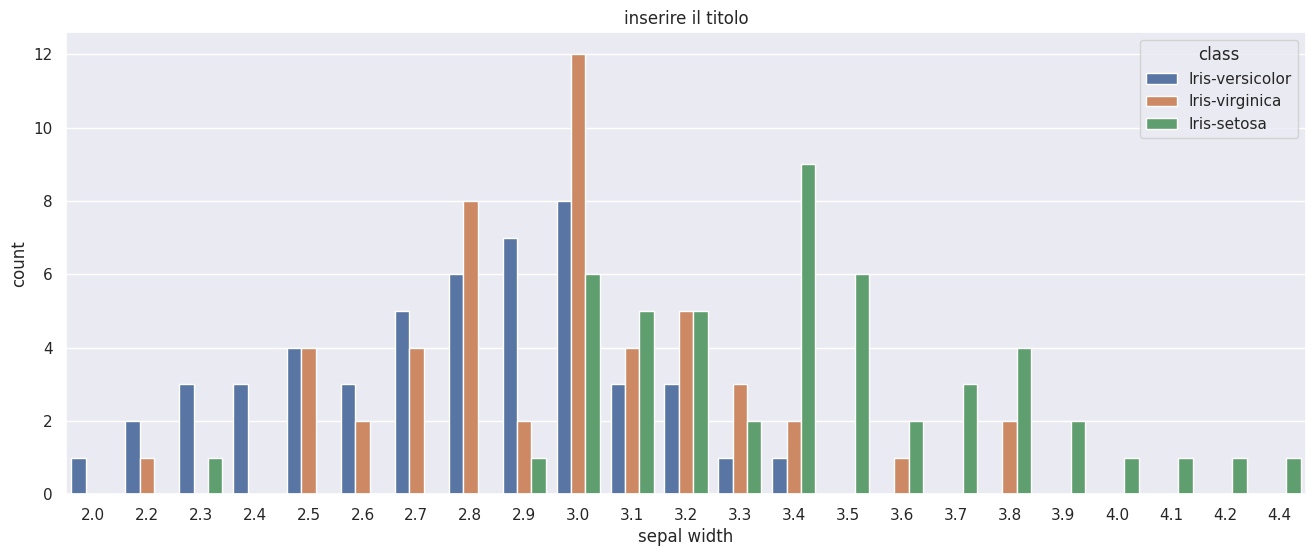

In [17]:
plt.figure(figsize=(16, 6))
plt.title('inserire il titolo')
plt.legend('class')
sns.countplot(x='sepal width',data=df,hue='class');

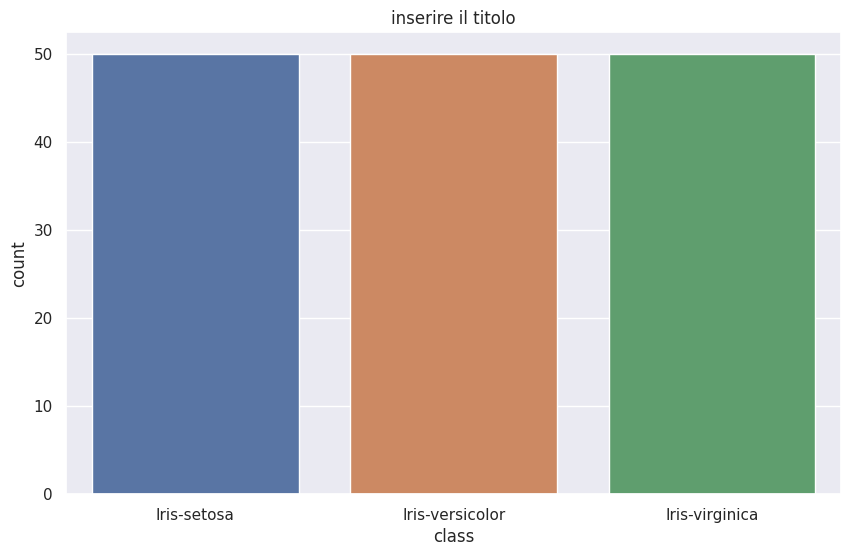

In [18]:
plt.figure(figsize=(10, 6))
plt.title('inserire il titolo')
sns.countplot(x='class', hue="class", data=df);

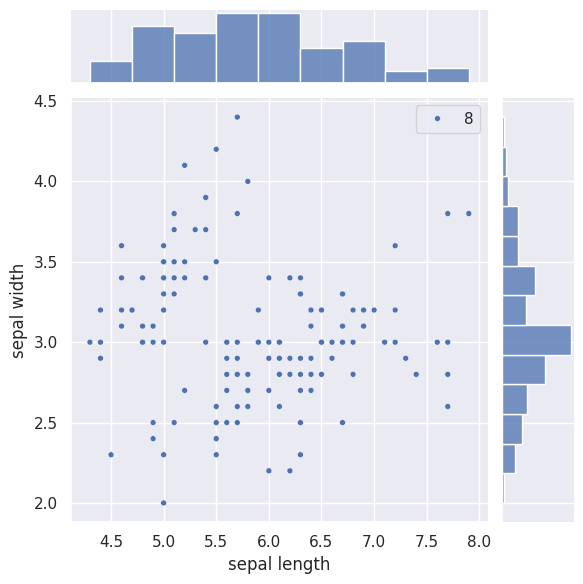

In [19]:
sns.jointplot(x="sepal length", y="sepal width", data=df, size=8);

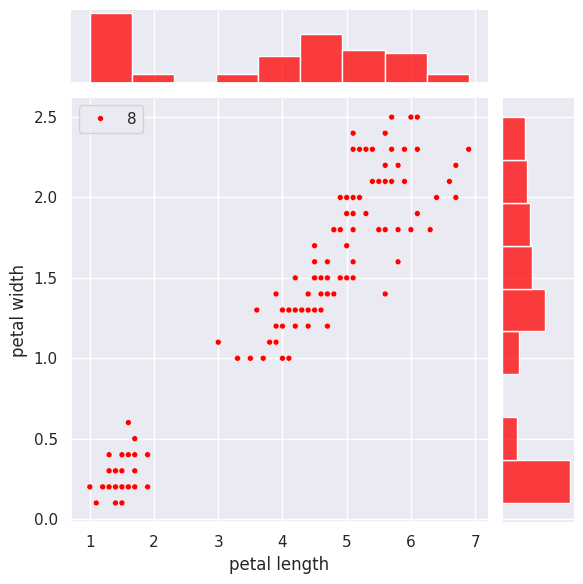

In [20]:
sns.jointplot(x="petal length", y="petal width", data=df, size=8, color='red');

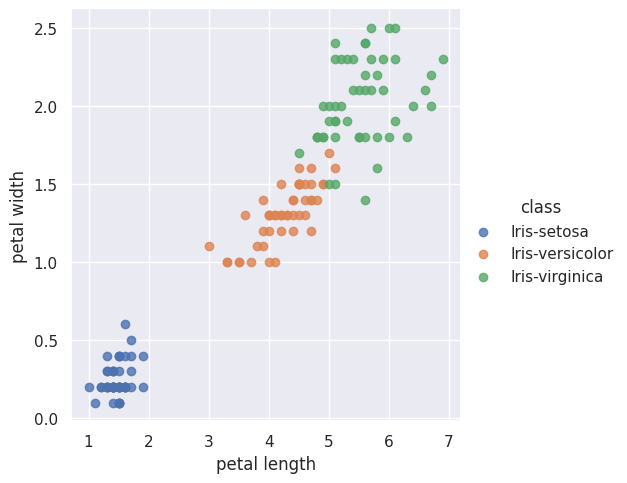

In [21]:
sns.lmplot(x="petal length", y="petal width",hue='class', data=df, fit_reg=False);

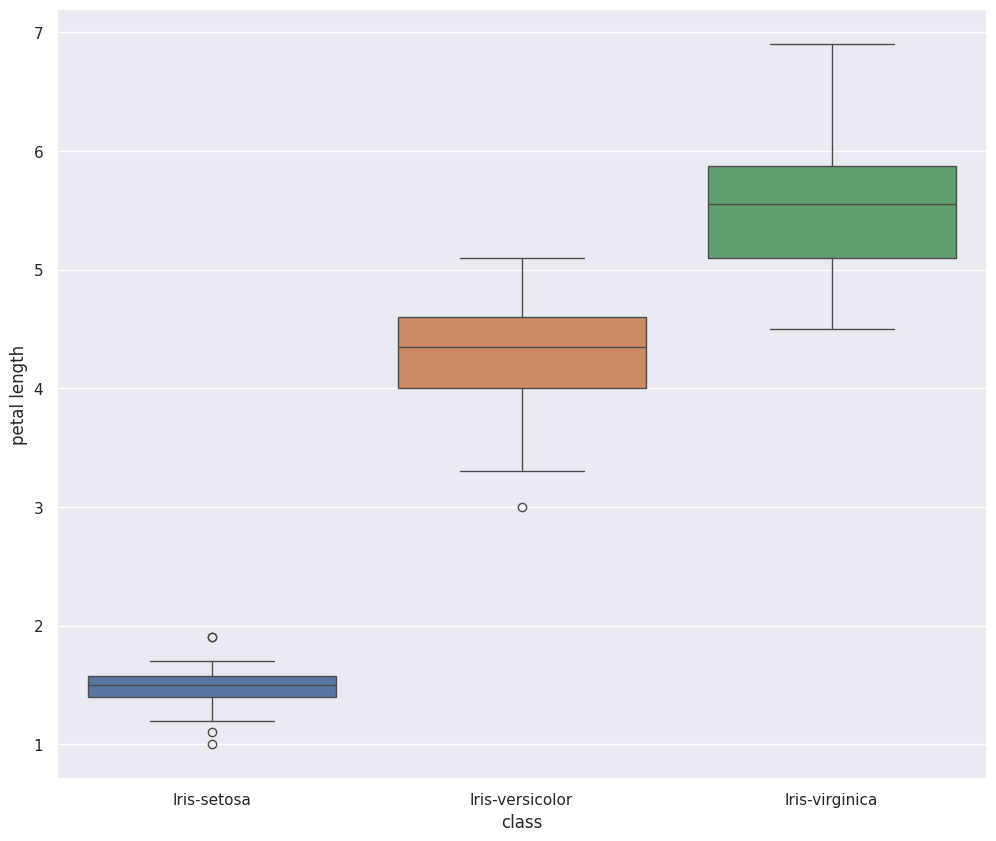

In [22]:
plt.figure(figsize=(12,10))
sns.boxplot(x="class", y="petal length", data=df,hue="class");

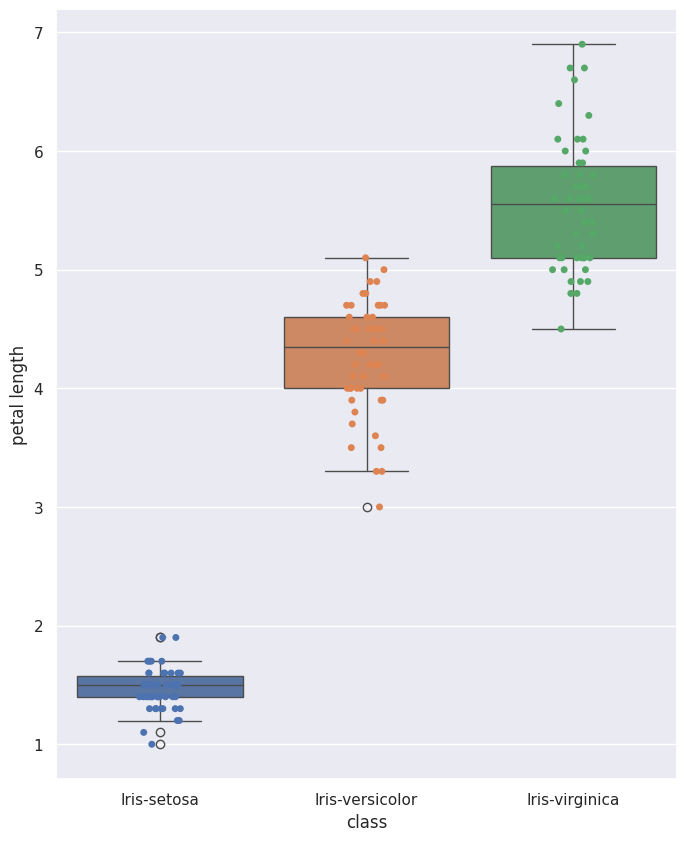

In [23]:
plt.figure(figsize=(8,10));

sns.boxplot(x="class", y="petal length", data=df,hue="class");
sns.stripplot(x="class", y="petal length", data=df,hue="class");

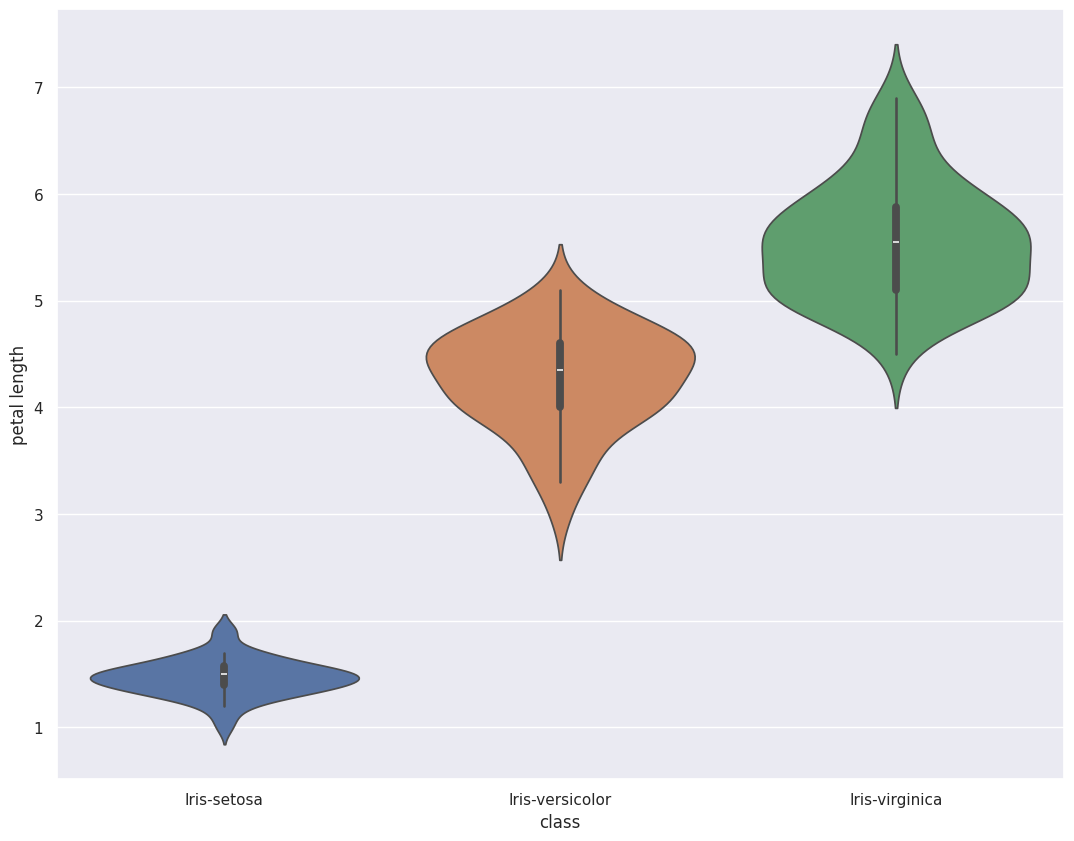

In [24]:
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length", data=df,hue="class");

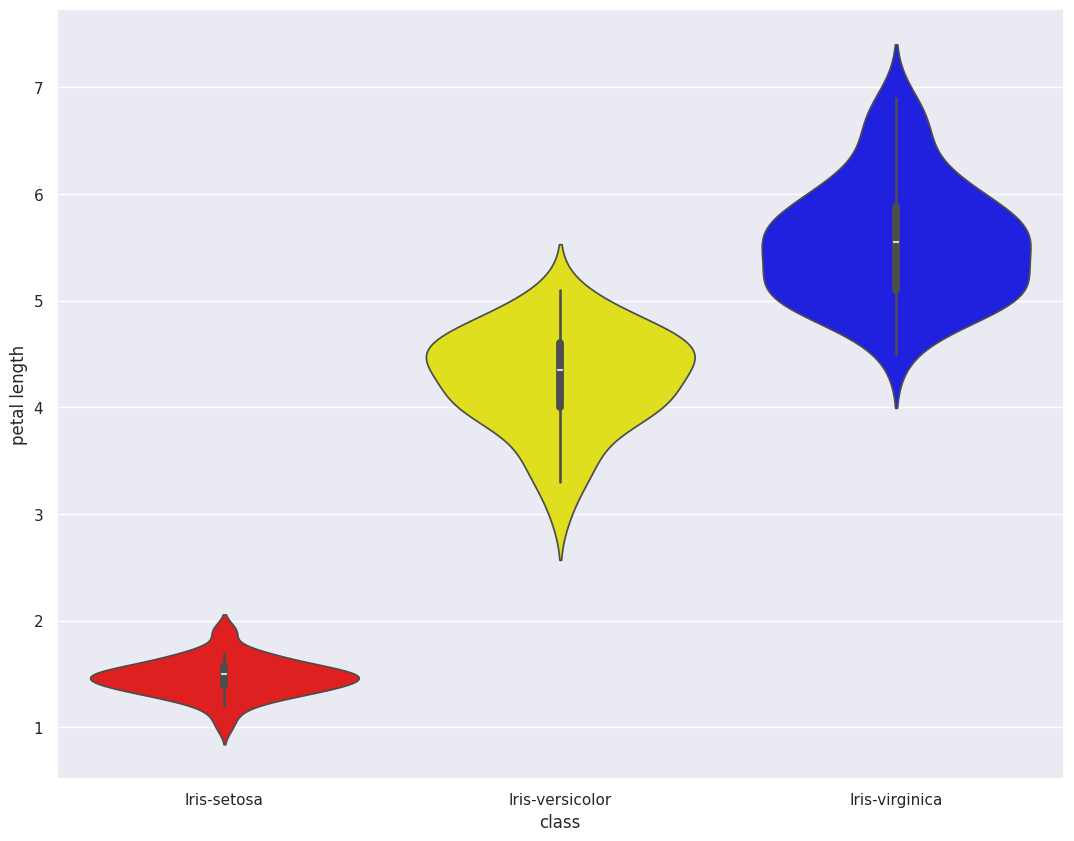

In [25]:
#palette
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length",  palette={"blue","red","yellow"}, data=df,hue="class");

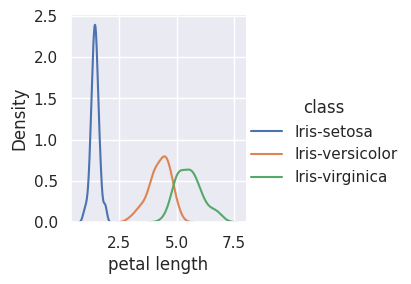

In [26]:
sns.FacetGrid(df, hue="class") \
   .map(sns.kdeplot, "petal length") \
   .add_legend();

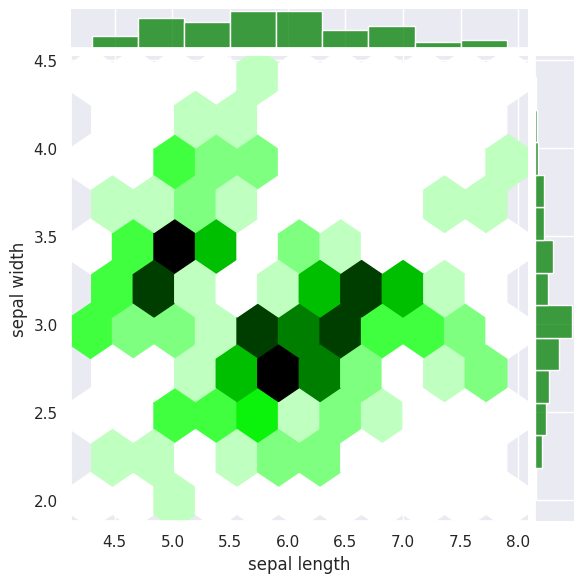

In [27]:
sns.jointplot(x="sepal length", y="sepal width", data=df,ratio=10, kind='hex',color='green')

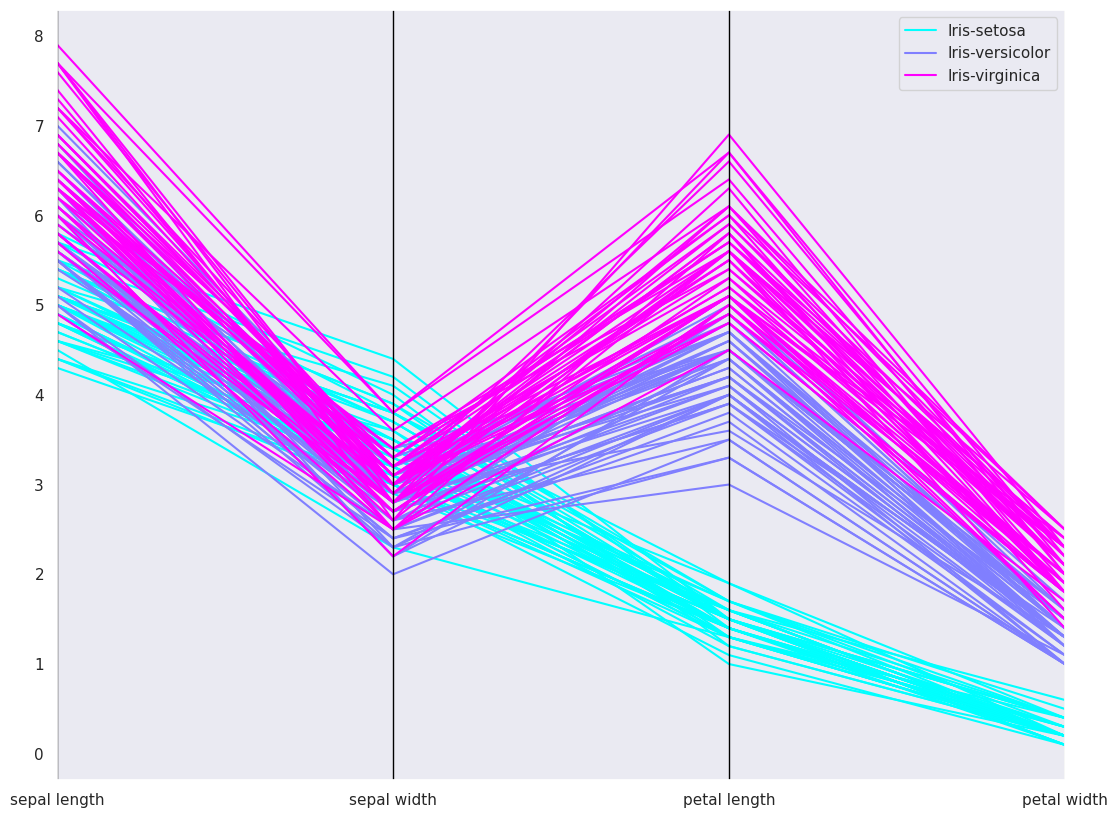

In [28]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(13,10));
parallel_coordinates(df, "class",colormap='cool');

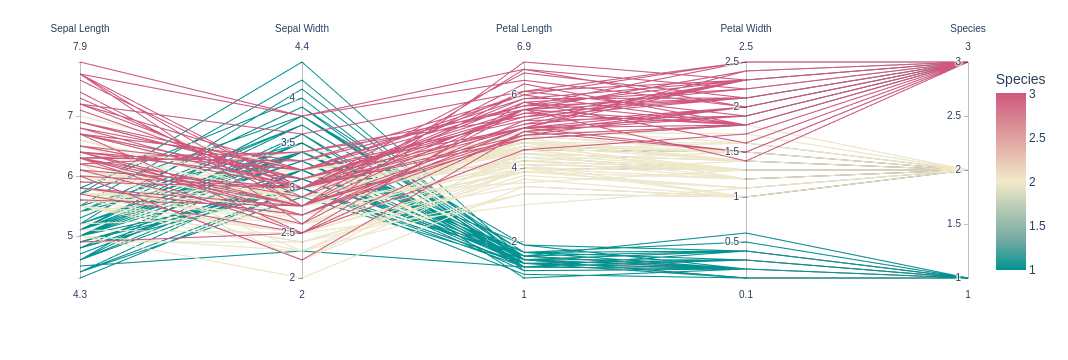

In [29]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [30]:
df_app=df.drop('species',axis=1,)
df_app

sepal_length  sepal_width  petal_length  petal_width  species_id
0             5.1          3.5           1.4          0.2           1
1             4.9          3.0           1.4          0.2           1
2             4.7          3.2           1.3          0.2           1
3             4.6          3.1           1.5          0.2           1
4             5.0          3.6           1.4          0.2           1
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           3
146           6.3          2.5           5.0          1.9           3
147           6.5          3.0           5.2          2.0           3
148           6.2          3.4           5.4          2.3           3
149           5.9          3.0           5.1          1.8           3

[150 rows x 5 columns]

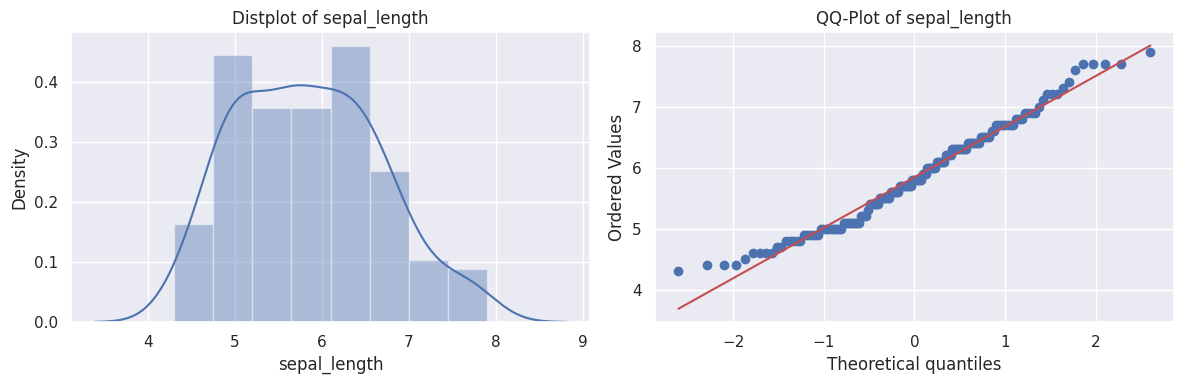

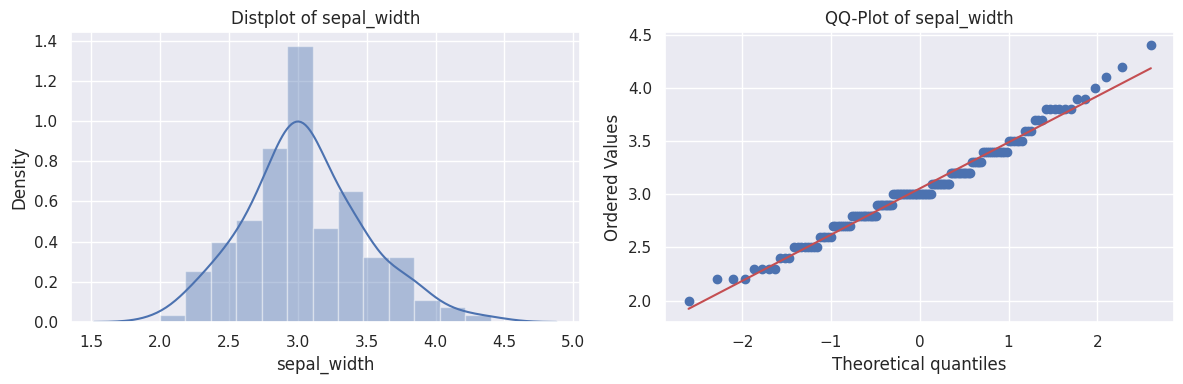

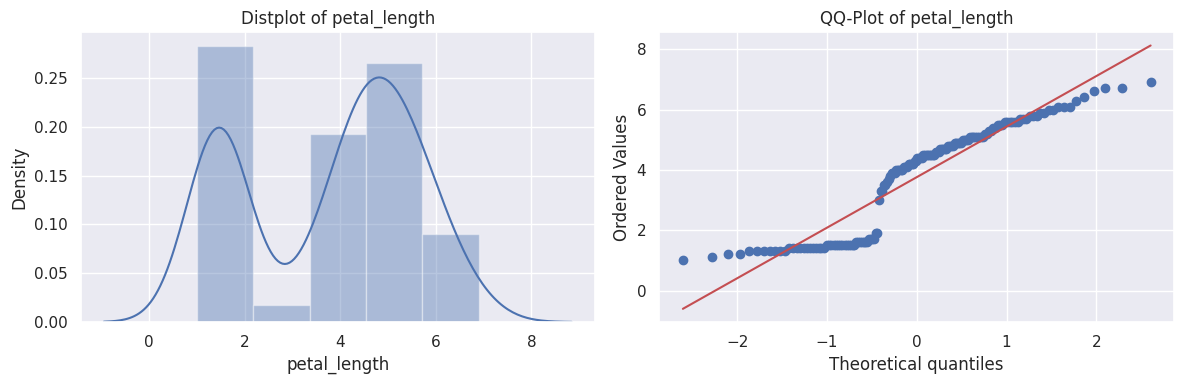

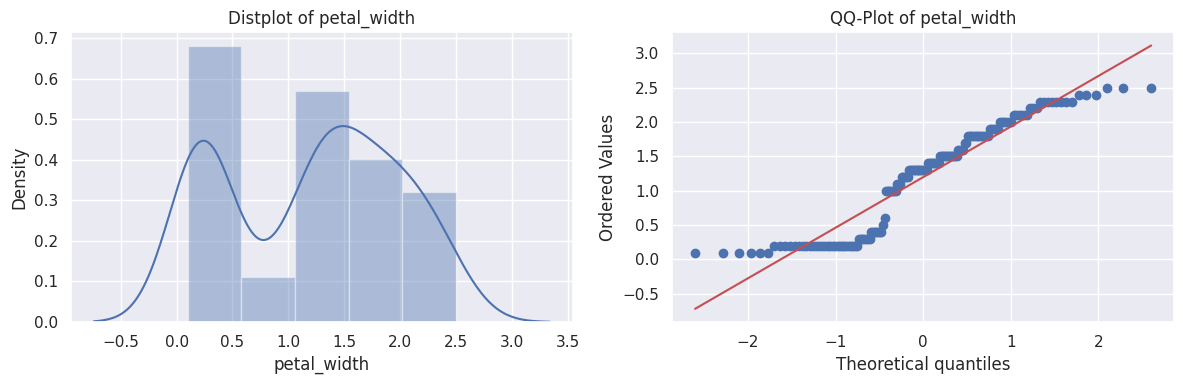

In [31]:
from scipy import stats



# Plot per ogni variabile
for column in df_app.iloc[:,0:-1].columns:
    plt.figure(figsize=(12, 4))

    # Histplot
    plt.subplot(1, 2, 1)
    sns.distplot(df[column], )

    plt.title(f'Distplot of {column}')

    # QQ-plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')

    plt.tight_layout()
    plt.show()

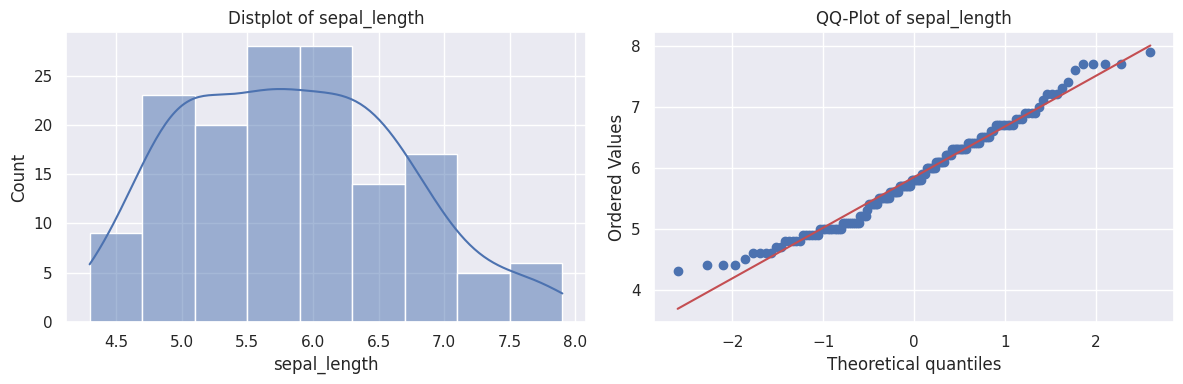

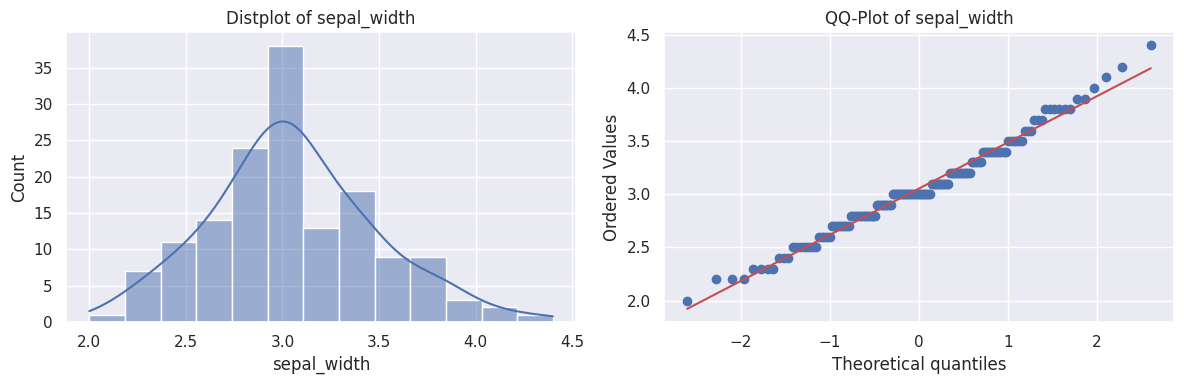

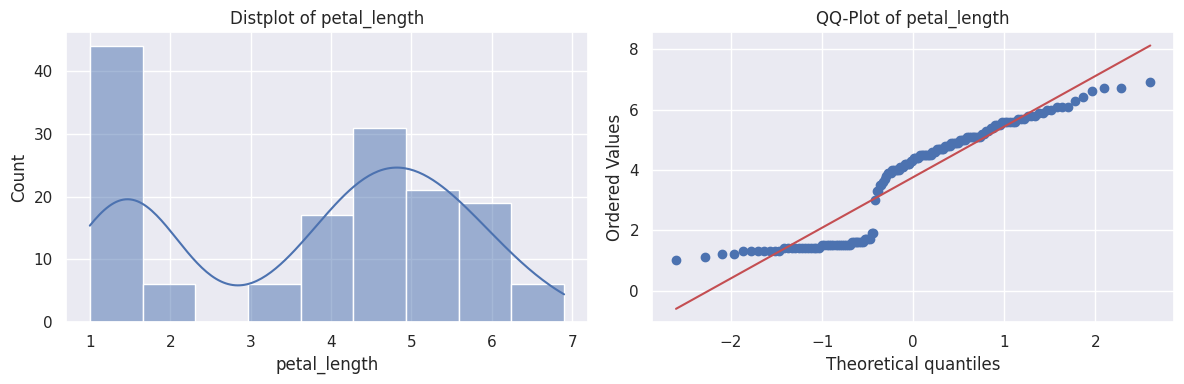

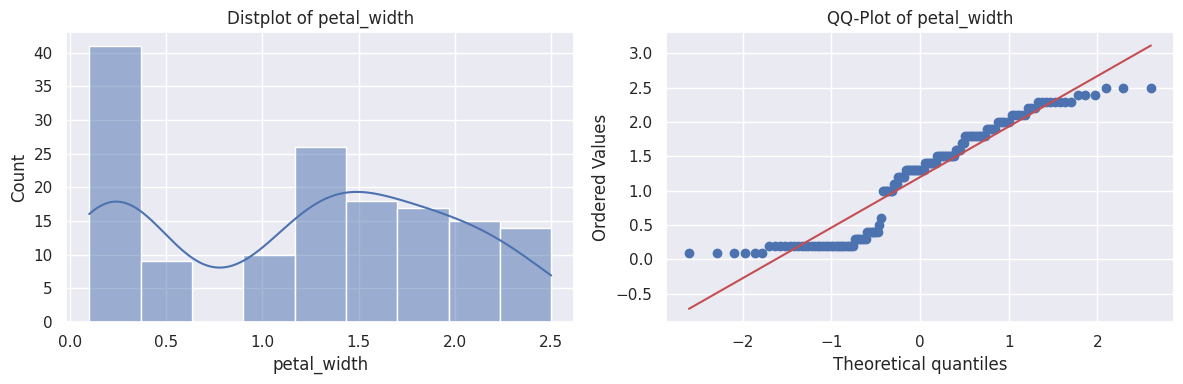

In [32]:
# Plot per ogni variabile
for column in df_app.iloc[:,0:-1].columns:
    plt.figure(figsize=(12, 4))

    # Histplot
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)

    plt.title(f'Distplot of {column}')

    # QQ-plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')

    plt.tight_layout()
    plt.show()

## Noi utilizziamo il dataframe importato da UCI manualmente, ma abbiamo appena verificato chè è lo stesso

In [33]:
target='species'
# store feature matrix in "x"
X = df.drop([target], axis=1)
# store response vector in "y"
y = df[target]

In [34]:
X.shape

(150, 5)

In [35]:
y.shape

(150,)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris_8.png',width=900,height=300)

In [38]:
#Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
print(y_test)

116     virginica
15         setosa
73     versicolor
80     versicolor
93     versicolor
51     versicolor
129     virginica
141     virginica
94     versicolor
123     virginica
12         setosa
106     virginica
69     versicolor
24         setosa
125     virginica
148     virginica
6          setosa
13         setosa
42         setosa
132     virginica
60     versicolor
68     versicolor
1          setosa
7          setosa
102     virginica
121     virginica
38         setosa
97     versicolor
98     versicolor
34         setosa
44         setosa
146     virginica
140     virginica
127     virginica
30         setosa
61     versicolor
48         setosa
103     virginica
21         setosa
31         setosa
114     virginica
53     versicolor
135     virginica
113     virginica
139     virginica
Name: species, dtype: object


In [39]:
#Train the model with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

LogisticRegression()

In [40]:
model.intercept_

array([ 10.26934942,   3.8335222 , -14.10287161])

In [41]:
model.coef_

array([[-0.433908  ,  0.59258592, -1.97114862, -0.77694935, -0.84728878],
       [ 0.17376057, -0.43371222,  0.39752368, -0.1326419 , -1.35847894],
       [ 0.26014743, -0.1588737 ,  1.57362494,  0.90959125,  2.20576771]])

In [42]:
# [b1_set,b2_set,b3_set,b4_set] # beta coeff setosa
# [b1_ver,b2_ver,b3_ver,b4_ver] # beta coeff versicolor
# [b1_vir,b2_vir,b3_vir,b4_vir] # beta coeff virginica

In [43]:
X_test.iloc[0]

sepal_length    6.5
sepal_width     3.0
petal_length    5.5
petal_width     1.8
species_id      3.0
Name: 116, dtype: float64

In [44]:
## How classification work
## X_test.iloc[0]
X1 = 6.5 # sepal length
X2 = 3.0 # sepal width
X3 = 5.5 # petal length
X4 = 1.8 # petal width

# y1=(b0_set+b1_set*X1+b2_set*X2+b3_set*X3+b4_set*X4) # Linear reg setosa
# y2=(b0_ver+b1_ver*X1+b2_ver*X2+b3_ver*X3+b4_ver*X4) # Linear reg versicolor
# y3=(b0_vir+b1_vir*X1+b2_vir*X2+b3_vir*X3+b4_vir*X4) # Linear reg virginica

y1=(10.36122821-0.47684664*X1 + 0.76508588*X2 -2.3968327*X3 -0.96721658*X4)
y2=(2.10475101+0.41151869*X1 -0.18774797*X2 -0.16175093*X3 -0.84080686*X4)
y3=(-12.46597922+0.06532795*X1 -0.57733791*X2 +2.55858363*X3 +1.80802344*X4)

p1 = 1/(1+np.exp(-y1)) #prop setosa
p2 = 1/(1+np.exp(-y2)) #prop versicolor
p3 = 1/(1+np.exp(-y3)) #prop virginica

prob = np.array([p1,p2,p3])
prob

array([0.00464834, 0.85975977, 0.97216661])

In [45]:
def softmax(x):
    """Applying softmax to the array x """
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

prob_normalized = softmax(prob)
prob_normalized

array([0.16713905, 0.39305027, 0.43981068])

Where p1​, p2​, and p3​ are the probabilities for each class calculated using the logistic function.

The probabilities are calculated using the sigmoid function (the logistic function) to map the output x values to a range between 0 and 1:

$$p = \frac{1}{1 + e^{-x}}$$
However, the probabilities you've computed might not sum up to 1 due to how you've calculated and normalized them. The probabilities of each class for a given observation should sum up to 1 after the application of the softmax function.

To ensure the probabilities are correctly normalized, you should apply the softmax function to the output scores x for each class:

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$
where N is the total number of classes.

The softmax function will ensure that the probabilities sum up to 1 across all classes for a given observation. This normalization is often used in multi-class classification problems

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/logisticreg.png" width="800">

In [46]:
model.predict_proba(X_test)

array([[6.40461214e-05, 7.67729883e-02, 9.23162966e-01],
       [9.85054093e-01, 1.49454913e-02, 4.15928273e-07],
       [4.75468068e-03, 9.34483770e-01, 6.07615493e-02],
       [4.11823526e-02, 9.42519723e-01, 1.62979248e-02],
       [1.55959212e-01, 8.37289726e-01, 6.75106231e-03],
       [7.77057654e-03, 9.18322076e-01, 7.39073477e-02],
       [1.93367885e-05, 6.34572860e-02, 9.36523377e-01],
       [9.36865384e-05, 6.91533376e-02, 9.30752976e-01],
       [1.80495529e-02, 9.46599186e-01, 3.53512614e-02],
       [4.49746594e-04, 1.56818022e-01, 8.42732231e-01],
       [9.76535427e-01, 2.34643055e-02, 2.67409538e-07],
       [4.23526340e-03, 2.81526477e-01, 7.14238259e-01],
       [3.40423034e-02, 9.46863798e-01, 1.90938991e-02],
       [9.47362730e-01, 5.26359325e-02, 1.33797071e-06],
       [8.09528516e-06, 3.95266738e-02, 9.60465231e-01],
       [6.73350307e-05, 4.85889762e-02, 9.51343689e-01],
       [9.84198252e-01, 1.58015051e-02, 2.43352459e-07],
       [9.91362431e-01, 8.63750

In [47]:
# indice 2: "virginica"
# indice 1: "versicolor"
# indice 0: "setosa"

max_prob = np.array([np.argmax(element) for element in model.predict_proba(X_test)])
max_prob

array([2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2,
       2])

Il metrodo predict di LogisitiRegression(), va ad associare per ogni indice di colonna di probabilitò, la corrispondente classe:
- indice 2: "virginica"
- indice 1: "versicolor"
- indice 0: "setosa"


In [48]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

['virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica' 'virginica']


In [49]:
confronto = pd.DataFrame(data = [y_pred,y_test])
confronto = confronto.T
confronto.columns = ['predetti', 'reali_test']
confronto

predetti  reali_test
0    virginica   virginica
1       setosa      setosa
2   versicolor  versicolor
3   versicolor  versicolor
4   versicolor  versicolor
5   versicolor  versicolor
6    virginica   virginica
7    virginica   virginica
8   versicolor  versicolor
9    virginica   virginica
10      setosa      setosa
11   virginica   virginica
12  versicolor  versicolor
13      setosa      setosa
14   virginica   virginica
15   virginica   virginica
16      setosa      setosa
17      setosa      setosa
18      setosa      setosa
19   virginica   virginica
20  versicolor  versicolor
21  versicolor  versicolor
22      setosa      setosa
23      setosa      setosa
24   virginica   virginica
25   virginica   virginica
26      setosa      setosa
27  versicolor  versicolor
28  versicolor  versicolor
29      setosa      setosa
30      setosa      setosa
31   virginica   virginica
32   virginica   virginica
33   virginica   virginica
34      setosa      setosa
35  versicolor  versicolor
36      setosa      setosa
37   virginica   virginica
38      setosa      setosa
39      setosa      setosa
40   virginica   virginica
41  versicolor  versicolor
42   virginica   virginica
43   virginica   virginica
44   virginica   virginica

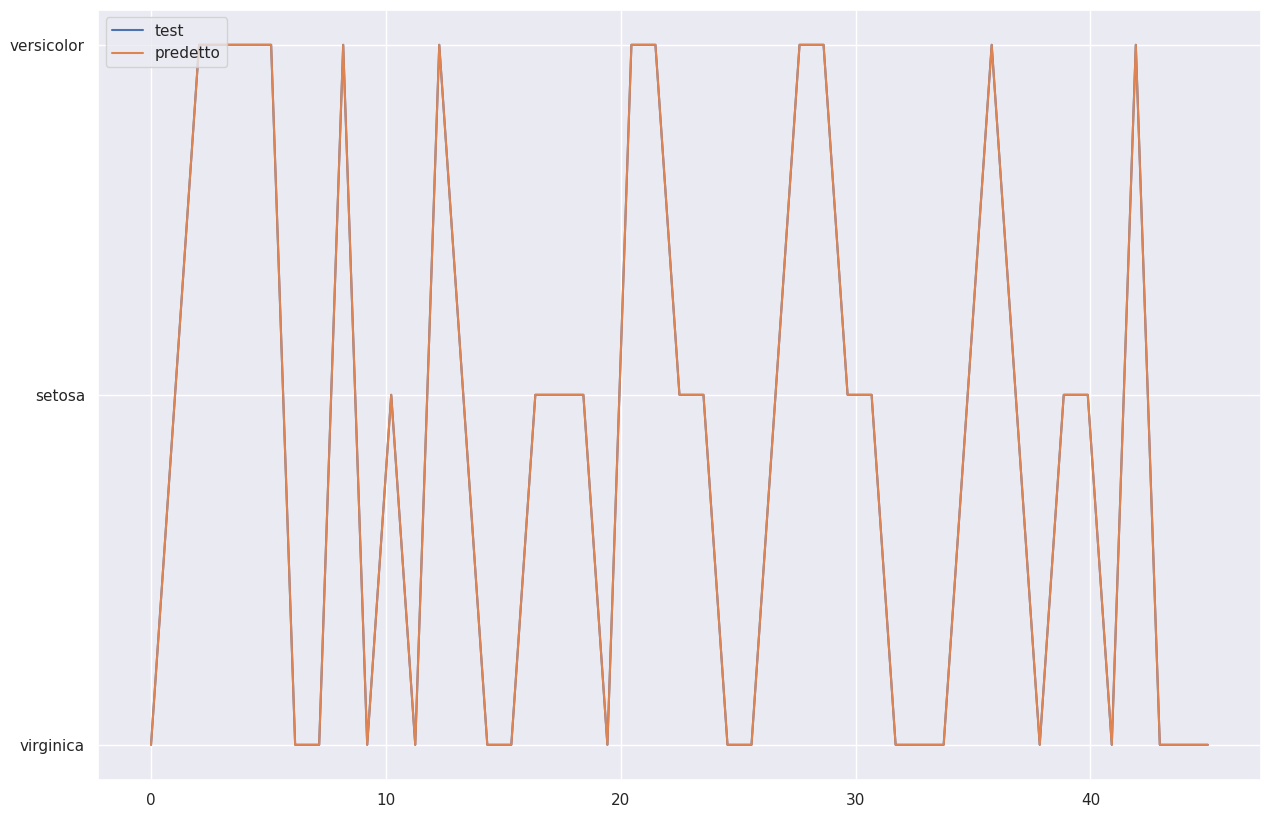

In [50]:
import numpy as np
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [51]:
model.predict([ [2,3,5,2,1], [2,2,1,1,3], ])

array(['versicolor', 'setosa'], dtype=object)

In [52]:
probs_y=model.predict_proba(X_test)
### Print results
probs_y = np.round(probs_y, 2)
res = "{:<15} | {:<15} | {:<15} | {:<15} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<15} | {:<15} | {:<15} | {:<15} | {:<15}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test          | y_pred          | Setosa(%)       | versicolor(%)   | virginica(%)
-----------------------------------------------------------------
virginica       | virginica       | 0.0             | 0.08            | 0.92           
setosa          | setosa          | 0.99            | 0.01            | 0.0            
versicolor      | versicolor      | 0.0             | 0.93            | 0.06           
versicolor      | versicolor      | 0.04            | 0.94            | 0.02           
versicolor      | versicolor      | 0.16            | 0.84            | 0.01           
versicolor      | versicolor      | 0.01            | 0.92            | 0.07           
virginica       | virginica       | 0.0             | 0.06            | 0.94           
virginica       | virginica       | 0.0             | 0.07            | 0.93           
versicolor      | versicolor      | 0.02            | 0.95            | 0.04           
virginica       | virginica       | 0.0             | 0.1

In [53]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

L'accuracy totale è: 100.0%


### save model as .PKL file

In [54]:
import joblib

joblib.dump(model,"logistic_reg_iris.pkl")

['logistic_reg_iris.pkl']

### INFERENCE

In [55]:
loaded_model = joblib.load("logistic_reg_iris.pkl")
loaded_model

LogisticRegression()

In [56]:
loaded_model.predict([[3,2,1,1,4]])[0]

'setosa'